# <center>Online Retail<center/>

### <strong>Cohort Analysis<strong/>

Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

Cohort analysis is a tool to measure user engagement over time. It helps to know whether user engagement is actually getting better over time or is only appearing to improve because of growth.

Cohort analysis proves to be valuable because it helps to separate growth metrics from engagement metrics as growth can easily mask engagement problems. In reality, the lack of activity of the old users is being hidden by the impressive growth numbers of new users, which results in concealing the lack of engagement from a small number of people.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('C:\laragon\www\Online_Retail\OnlineRetail.csv', encoding= 'unicode_escape')

In [8]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  Custom

In [9]:
df.shape

(541909, 8)

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [15]:
#drop rows with no customer ID
df = df.dropna(subset=['CustomerID'])
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  Custom

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_5416\3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [23]:
#create an invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)
#apply the function 
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.tail()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5416\3797398548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,2011-09-01


In [25]:
#create a column index with the minimum invoice date aka first time customer was acquired
df['Cohort Month'] =  df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head(30)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5416\198144409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cohort Month'] =  df.groupby('CustomerID')['InvoiceMonth'].transform('min')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,2010-01-01,2010-01-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,2010-01-01,2010-01-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,2010-01-01,2010-01-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,2010-01-01,2010-01-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,2010-01-01,2010-01-01


In [26]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [28]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(df,'Cohort Month')

In [29]:
#check the series 
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01-01,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01-01,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01-01,2010-01-01


In [32]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5416\3578407895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortIndex'] = year_diff*12+month_diff+1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09-01,2011-08-01,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09-01,2011-08-01,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09-01,2011-08-01,2
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,2011-09-01,2011-08-01,2


In [36]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = df.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-01-01,1,98
1,2010-01-01,2,9
2,2010-01-01,3,4
3,2010-01-01,5,7
4,2010-01-01,6,7
...,...,...,...
246,2011-10-01,2,50
247,2011-10-01,3,10
248,2011-11-01,1,218
249,2011-11-01,2,10


In [38]:
# create a pivot table 
cohort_table = cohort_data.pivot_table(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,98.0,9.0,4.0,NaN,7.0,7.0,4.0,10.0,10.0,5.0,...,38.0,40.0,36.0,44.0,41.0,37.0,41.0,44.0,40.0,23.0
2010-02-01,108.0,2.0,NaN,NaN,3.0,7.0,5.0,12.0,5.0,NaN,...,39.0,38.0,43.0,48.0,34.0,41.0,45.0,53.0,19.0,NaN
2010-03-01,49.0,NaN,1.0,1.0,1.0,2.0,5.0,NaN,NaN,14.0,...,23.0,16.0,19.0,19.0,13.0,24.0,23.0,9.0,NaN,NaN
2010-05-01,68.0,3.0,3.0,2.0,3.0,1.0,NaN,24.0,32.0,20.0,...,30.0,32.0,31.0,33.0,40.0,20.0,NaN,NaN,NaN,NaN
2010-06-01,76.0,2.0,4.0,4.0,1.0,NaN,26.0,29.0,25.0,25.0,...,27.0,33.0,26.0,39.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-07-01,53.0,2.0,2.0,1.0,NaN,9.0,24.0,22.0,22.0,19.0,...,22.0,20.0,29.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,87.0,3.0,2.0,NaN,30.0,37.0,30.0,34.0,33.0,36.0,...,41.0,49.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,83.0,1.0,NaN,23.0,29.0,20.0,30.0,23.0,29.0,26.0,...,32.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,38.0,NaN,11.0,15.0,12.0,15.0,18.0,8.0,14.0,11.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

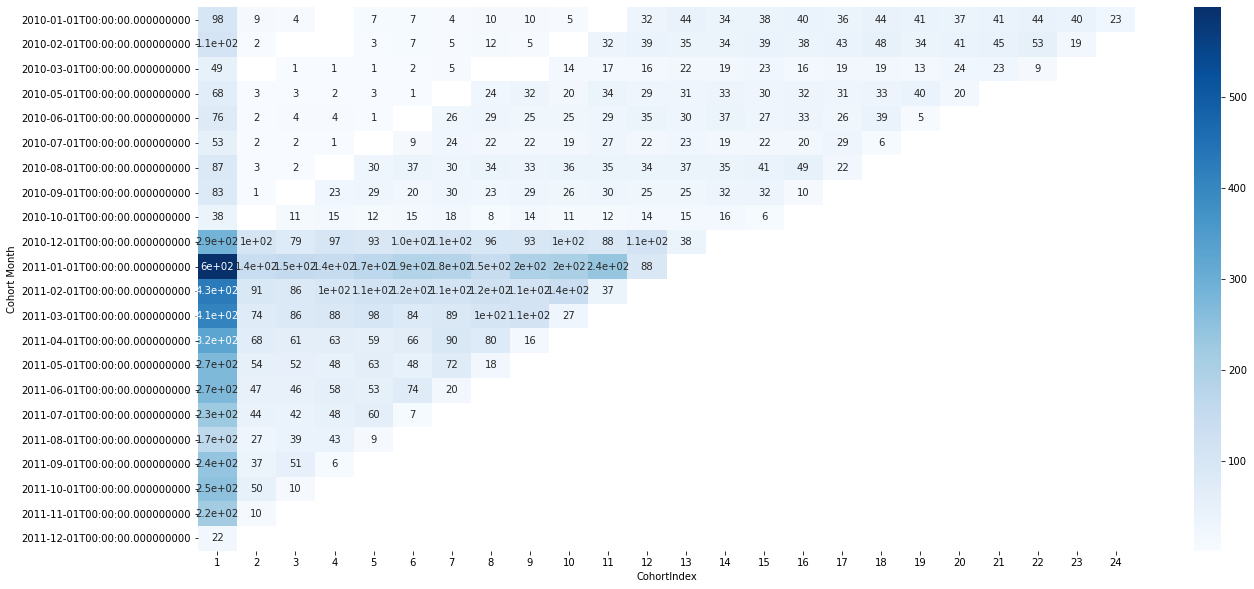

In [39]:
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [40]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1.0,0.091837,0.040816,NaN,0.071429,0.071429,0.040816,0.102041,0.102041,0.051020,...,0.387755,0.408163,0.367347,0.448980,0.418367,0.377551,0.418367,0.448980,0.408163,0.234694
2010-02-01,1.0,0.018519,NaN,NaN,0.027778,0.064815,0.046296,0.111111,0.046296,NaN,...,0.361111,0.351852,0.398148,0.444444,0.314815,0.379630,0.416667,0.490741,0.175926,NaN
2010-03-01,1.0,NaN,0.020408,0.020408,0.020408,0.040816,0.102041,NaN,NaN,0.285714,...,0.469388,0.326531,0.387755,0.387755,0.265306,0.489796,0.469388,0.183673,NaN,NaN
2010-05-01,1.0,0.044118,0.044118,0.029412,0.044118,0.014706,NaN,0.352941,0.470588,0.294118,...,0.441176,0.470588,0.455882,0.485294,0.588235,0.294118,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.026316,0.052632,0.052632,0.013158,NaN,0.342105,0.381579,0.328947,0.328947,...,0.355263,0.434211,0.342105,0.513158,0.065789,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.037736,0.037736,0.018868,NaN,0.169811,0.452830,0.415094,0.415094,0.358491,...,0.415094,0.377358,0.547170,0.113208,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.034483,0.022989,NaN,0.344828,0.425287,0.344828,0.390805,0.379310,0.413793,...,0.471264,0.563218,0.252874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,1.0,0.012048,NaN,0.277108,0.349398,0.240964,0.361446,0.277108,0.349398,0.313253,...,0.385542,0.120482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.0,NaN,0.289474,0.394737,0.315789,0.394737,0.473684,0.210526,0.368421,0.289474,...,0.157895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='Cohort Month'>

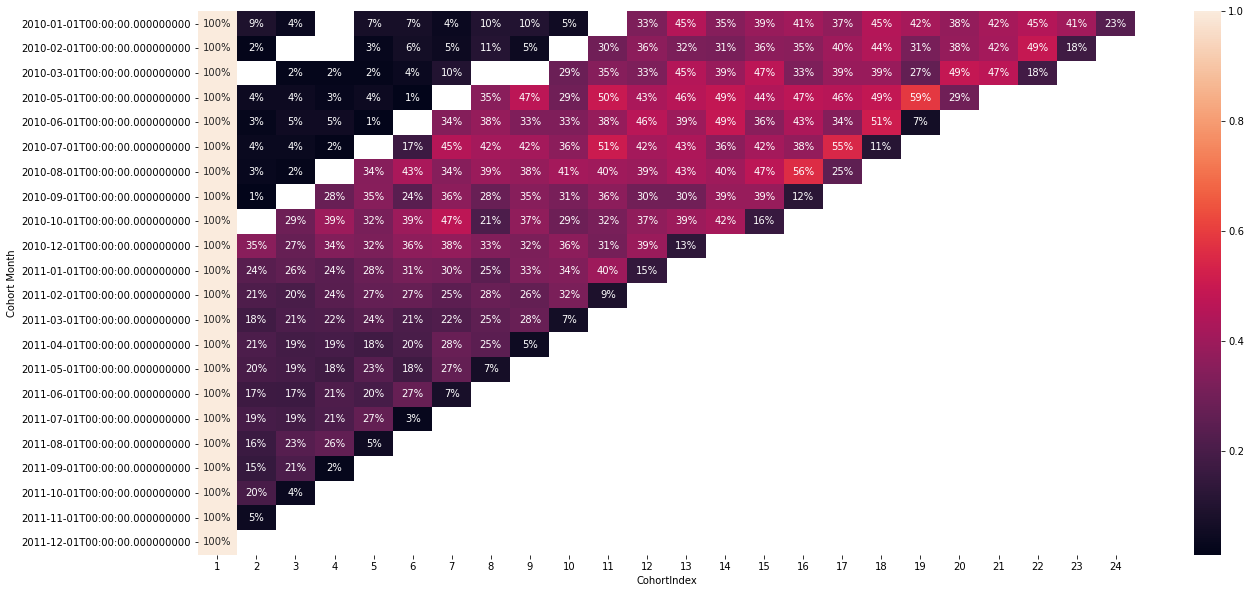

In [41]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')